In [1]:
#importando as bibliotecas necessárias para análise
import pandas as pd
import pyspark as ps
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from matplotlib import figure as f

In [3]:
df = pd.read_csv('data-test-analytics_5.csv')

df.head(10)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm
5,cf80033a-1db3-4be3-a4a6-6f9b84e1386f,06/09/17 04:33 PM,01/17/21 11:23 AM,NaN,cf265c74accb4515f76e88da7f0335b1,ea4e1b6806047a3b242407ef357b42d2,32a0aa971754151ae60997557aac5b0c,04/17/55 12:00 AM,active,4.28.7,Aragão,AM,Vila Maria,01/17/21 11:23 AM,215.477590,5,1723.820720,8,32,organic_search
6,930858b1-ee5f-4df3-94d5-d43dc3eff4d8,05/25/17 08:02 PM,01/14/21 11:23 AM,NaN,11745281baed2848056b1c12429f4568,b635255e2ba4c1795cdd7c0fbb4f9fa7,801df89c92c5c4074d1fe4d98025114d,06/23/80 12:00 AM,active,4.39.6,Lopes,MT,Braúnas,01/14/21 11:23 AM,195.854439,10,1566.835509,8,35,organic_search
7,e7b78675-9438-4191-94c7-f942abcdca8b,10/17/17 06:53 AM,01/16/21 11:23 AM,NaN,d4a03617762eb43723f568504f1f4d87,22f015e7f10316bd27ba5fab7b561b59,717d36dc02ecb8dbd5f4ff24070f986f,12/10/56 12:00 AM,active,3.37.9,Pereira Grande,SC,Bacurau,01/16/21 11:23 AM,216.017707,8,864.070826,4,33,direct
8,6ba36c18-a1c4-4d30-89dd-adbd37c9d9e6,12/09/17 04:32 AM,01/10/21 11:23 AM,NaN,8759be223400046cbba4660542ab4c4e,06ed346394436dcd6872bb2a0e0e0403,f020b665d2b392f5b57d60a3b220cd63,07/05/72 12:00 AM,active,3.12.13,Fernandes Alegre,PR,Piraja,01/10/21 11:23 AM,221.978135,8,443.956271,2,39,organic_search
9,70029e96-d57e-4fef-9795-bd4152ebf9a0,10/24/19 09:17 AM,01/05/21 11:23 AM,NaN,25c5b4a6aeadeeef092ef6dec7af4715,e1e503cd491a94c7ba6d91e4968d2eeb,e526b5c40284b5d915511824a42dc668,05/11/66 12:00 AM,active,3.18.6,Cardoso do Sul,MT,Padre Eustáquio,01/05/21 11:23 AM,220.287961,7,660.863884,3,44,paid_search


In [4]:
df.shape

(10000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [6]:
#Colocar o id como index do dataset
df.set_index('id',inplace=True)

df.head()

,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
id,,,,,,,,,,,,,,,,,,,
8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [7]:
#elimindando as colunas que não serão relevantes para análise
df.drop(columns= {'name_hash', 'email_hash', 'address_hash','neighborhood'}, inplace=True)

df.head()

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
id,,,,,,,,,,,,,,,
8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [8]:
#criando um backup
df_back = df.copy()

In [9]:
#analisando as colunas em detalhe
df.columns

Index(['created_at', 'updated_at', 'deleted_at', 'birth_date', 'status',
       'version', 'city', 'state', 'last_date_purchase', 'average_ticket',
       'items_quantity', 'all_revenue', 'all_orders', 'recency',
       'marketing_source'],
      dtype='object')

In [10]:
#Identificação dos valores nulos
df.isnull().sum()

created_at               0
updated_at               0
deleted_at            9495
birth_date               0
status                   0
version                  0
city                     0
state                    0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

In [11]:
# Filtrando os valores nulos ou ausentes | NA , NULL , NaN , NaT 
filtronulo = df.deleted_at.isna()
df.loc[filtronulo]

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
id,,,,,,,,,,,,,,,
8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90c9fd5f-80d2-4f59-9970-6b3e6dac5f57,09/12/17 12:35 AM,01/31/21 11:23 AM,NaN,09/12/61 12:00 AM,active,4.30.12,Souza,RN,01/31/21 11:23 AM,215.079785,5,1075.398927,5,18,paid_search
0edb7aec-8816-4904-bcd7-cbe141391441,04/20/18 07:43 AM,01/18/21 11:23 AM,NaN,09/15/69 12:00 AM,active,4.28.13,Silveira,AL,01/18/21 11:23 AM,254.525826,10,2290.732434,9,31,organic_search
30130652-d616-4b40-adbb-189e3351016c,08/14/17 12:28 AM,01/03/21 11:23 AM,NaN,01/14/60 12:00 AM,active,3.18.11,Martins,SC,01/03/21 11:23 AM,208.741902,8,1252.451411,6,46,paid_search


In [12]:
#filtro de cancelados
filtrocancelado = df.status == 'canceled'
dfcancelado = df.loc[filtrocancelado]
dfcancelado

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
id,,,,,,,,,,,,,,,
9e755f27-01e7-4e2f-aaba-18f733f3e3d9,12/06/16 08:43 PM,06/17/18 11:59 PM,06/17/18 11:59 PM,01/25/66 12:00 AM,canceled,5.31.5,Moreira do Galho,AP,07/13/17 06:36 AM,190.017737,9,1140.106424,6,1316,crm
03718a9c-d9d8-42e9-aae2-3fce5eff9e21,09/21/17 09:33 AM,12/11/18 04:09 AM,12/11/18 04:09 AM,10/18/79 12:00 AM,canceled,2.15.3,Ferreira Alegre,SP,11/09/17 05:40 PM,234.207818,11,468.415636,2,1196,organic_search
9e51382b-e7dc-4430-9d04-f39b36d25cf6,09/02/20 06:53 PM,02/14/21 06:19 PM,02/14/21 06:19 PM,11/08/75 12:00 AM,canceled,4.22.8,Almeida,MS,12/24/20 06:42 AM,215.223848,10,1076.119241,5,56,organic_search
5545e738-de0f-4740-b517-cc480aa5bc30,02/06/17 09:03 AM,08/24/20 09:44 AM,08/24/20 09:44 AM,07/28/76 12:00 AM,canceled,4.28.11,Costa Paulista,RS,07/23/17 11:11 AM,211.300132,6,1267.800790,6,1306,organic_search
ab77fb95-a328-4bdd-869d-a7353f6bb2f3,11/25/20 08:12 AM,12/08/20 06:45 AM,12/08/20 06:45 AM,08/11/49 12:00 AM,canceled,4.32.5,Almeida Alegre,SE,11/27/20 09:42 PM,214.151632,15,0.000000,0,82,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a599fde-745e-4aaa-ae68-61f3773effc2,11/27/20 02:17 PM,12/01/20 09:45 PM,12/01/20 09:45 PM,08/28/56 12:00 AM,canceled,4.37.3,Ribeiro,RR,11/28/20 08:34 AM,183.850017,9,0.000000,0,82,crm
b5b91dd6-2db2-4c7e-81b5-76df58fc1da6,11/11/18 10:18 AM,03/20/20 09:22 PM,03/20/20 09:22 PM,03/16/93 12:00 AM,canceled,3.40.6,Moura,BA,06/06/19 12:36 PM,224.884005,4,899.536020,4,622,none
dd1739ce-40b9-442a-83a5-be534559eabb,12/23/18 02:02 PM,07/26/19 12:01 PM,07/26/19 12:01 PM,02/01/60 12:00 AM,canceled,5.17.8,das Neves,GO,02/08/19 11:07 PM,233.283850,3,1632.986947,7,740,none


In [13]:
cancelado = df.loc[filtrocancelado]

In [14]:
#Média de ticket médio, itens comprados, total de receita, total de pedidos 
dfcancelado.mean()

C:\Users\naiara.gama_creditas\AppData\Local\Temp\ipykernel_29340\1583182627.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcancelado.mean()


average_ticket     217.438501
items_quantity       8.647525
all_revenue       1059.405752
all_orders           4.857426
recency            680.970297
dtype: float64

In [15]:
#Detalhamento dos cancelamentos
dfcancelado.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,505.000000,505.000000,505.000000,505.000000,505.000000
mean,217.438501,8.647525,1059.405752,4.857426,680.970297
std,22.503191,2.951748,774.373741,3.483446,463.006656
min,151.804161,1.000000,0.000000,0.000000,1.000000
25%,201.934997,7.000000,403.113961,2.000000,278.000000
50%,217.998175,9.000000,984.359042,5.000000,600.000000
75%,232.135380,11.000000,1669.802614,8.000000,1031.000000
max,278.300436,18.000000,2873.700656,11.000000,1820.000000


In [16]:
#Analisando a situação das assinaturas
df.groupby('status').size().sort_values(ascending=False)

status
active      8524
paused       971
canceled     505
dtype: int64

In [17]:
#Assinaturas por estado
df.groupby(['state'],dropna=False).size().sort_values(ascending=False)

state
TO    409
GO    403
RR    396
PR    385
RS    382
AP    381
RO    381
AM    380
CE    378
RJ    377
MS    374
MG    373
PB    372
SC    370
BA    368
MT    368
SE    367
PE    367
AC    357
DF    357
MA    354
SP    354
RN    353
AL    353
ES    352
PA    351
PI    338
dtype: int64

In [18]:
#Indice de cancelamento por canais
cancelado.groupby('marketing_source').size().sort_values(ascending=False)

marketing_source
organic_search       196
direct                96
paid_search           70
telegram_whatsapp     66
crm                   43
none                  34
dtype: int64

<Axes: xlabel='Canal', ylabel='Qtd. Ocorrencias'>

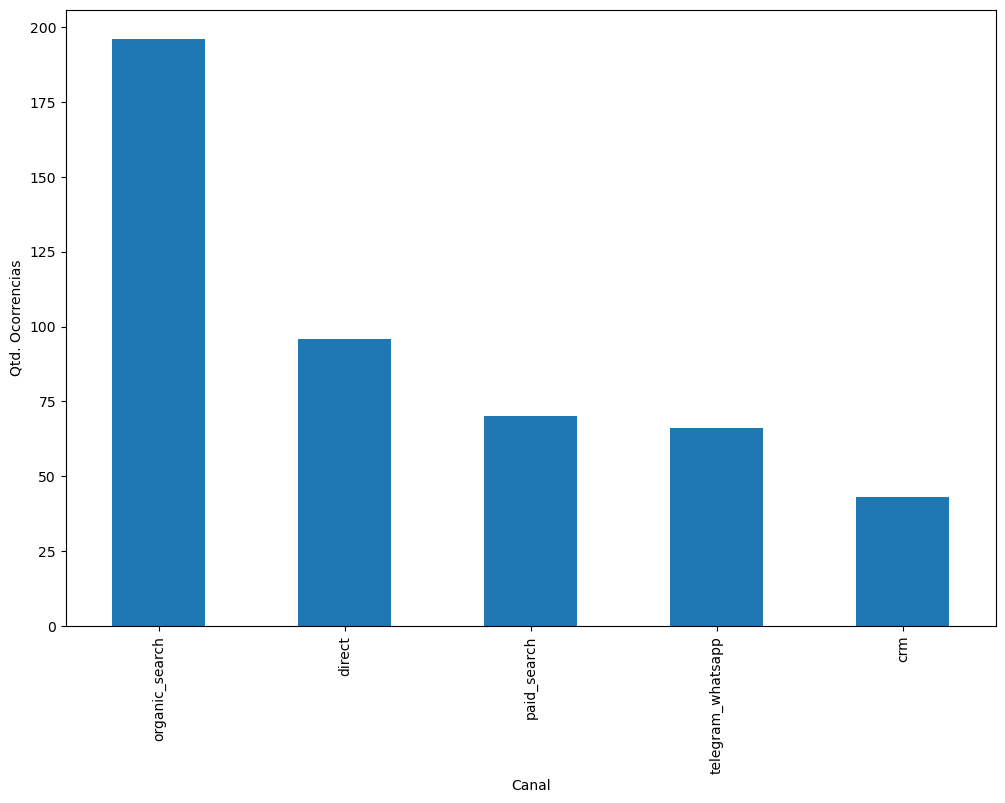

In [20]:
#Plotagem grárfico de barra, notamos maior incidencia de cancelamento por busca orgânica
cancelado.groupby(['marketing_source'],dropna=False).size().sort_values(ascending=False).head(5).plot.bar(figsize=(12,8),xlabel='Canal',ylabel='Qtd. Ocorrencias')

In [21]:
#indice de cancelamento por estado, possuimos maior indíce em RS
cancelado.groupby('state').size().sort_values(ascending=False)

state
RS    25
TO    24
SE    24
MT    24
MA    23
AM    23
RR    23
AL    22
PA    22
GO    21
MS    20
BA    20
PE    20
MG    19
CE    19
RO    17
PR    17
SP    16
RJ    16
AC    16
RN    15
DF    15
AP    15
PB    14
SC    12
ES    12
PI    11
dtype: int64

<Axes: xlabel='Estado', ylabel='Qtd. Ocorrencias'>

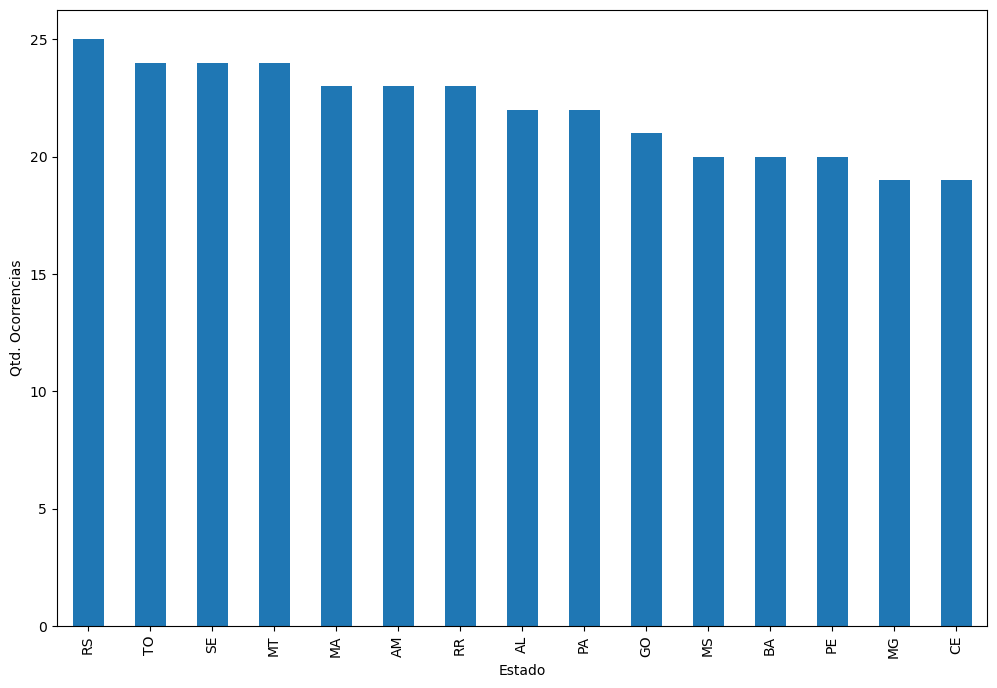

In [22]:
#Plotagem grárfico de barra cancelamento por estado, notamos uma média aproximada
cancelado.groupby(['state'],dropna=False).size().sort_values(ascending=False).head(15).plot.bar(figsize=(12,8),xlabel='Estado',ylabel='Qtd. Ocorrencias')

In [23]:
#filtro de pausados
filtropausado = df.status == 'paused'
dfpausado = df.loc[filtropausado]
dfpausado

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
id,,,,,,,,,,,,,,,
a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
4324c05a-26b5-4aec-ae71-8300b2298b0c,02/28/19 07:55 AM,01/12/21 11:23 AM,NaN,02/14/60 12:00 AM,paused,4.14.10,Araújo da Serra,PI,01/12/21 11:23 AM,203.890564,14,2242.796199,11,37,direct
a93a30d5-2cb9-4d20-ad1b-033a6e1fe36e,02/02/19 08:20 PM,01/23/21 11:23 AM,NaN,02/14/92 12:00 AM,paused,3.5.4,Correia do Galho,RO,01/23/21 11:23 AM,226.218157,8,0.000000,0,26,paid_search
f2dcd892-71ad-4f36-8907-25a4f0f982af,06/18/18 11:08 AM,01/14/21 11:23 AM,NaN,11/10/69 12:00 AM,paused,4.30.9,Monteiro,AP,01/14/21 11:23 AM,226.182000,10,1583.274002,7,35,direct
bc8d20cb-ab19-4606-8f92-16320172f490,01/20/20 06:11 PM,01/25/21 11:23 AM,NaN,12/30/67 12:00 AM,paused,4.38.8,Farias,SP,01/25/21 11:23 AM,213.950565,7,0.000000,0,24,paid_search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172e7938-df42-4d74-90c8-82405b9faf7f,01/25/21 10:53 AM,01/17/21 11:23 AM,NaN,01/12/67 12:00 AM,paused,4.30.10,Porto de da Cunha,GO,01/17/21 11:23 AM,224.630489,13,0.000000,0,32,paid_search
be830e02-2920-4e89-a4ac-e25f82478867,09/23/16 03:06 AM,01/24/21 11:23 AM,NaN,05/21/59 12:00 AM,paused,2.5.11,Cavalcanti,RJ,01/24/21 11:23 AM,249.381005,5,997.524018,4,25,paid_search
a8b11d1c-b591-4ab5-8e15-6fd6f682f889,02/14/18 11:17 AM,01/17/21 11:23 AM,NaN,03/06/53 12:00 AM,paused,3.37.11,Moura da Serra,GO,01/17/21 11:23 AM,191.778196,13,0.000000,0,32,organic_search


In [24]:
pausado = df.loc[filtropausado]

In [25]:
#indice de pausas por estado, possuimos maior indíce em MS
pausado.groupby('state').size().sort_values(ascending=False)

state
MS    49
RR    46
PA    45
AC    44
RS    40
PE    38
GO    38
SE    38
RJ    38
PR    38
PI    37
ES    37
DF    36
MT    36
SC    35
RO    35
BA    34
CE    34
MG    34
RN    32
AP    32
AM    31
AL    30
SP    30
TO    29
MA    28
PB    27
dtype: int64

<Axes: xlabel='Estado', ylabel='Qtd. Ocorrencias'>

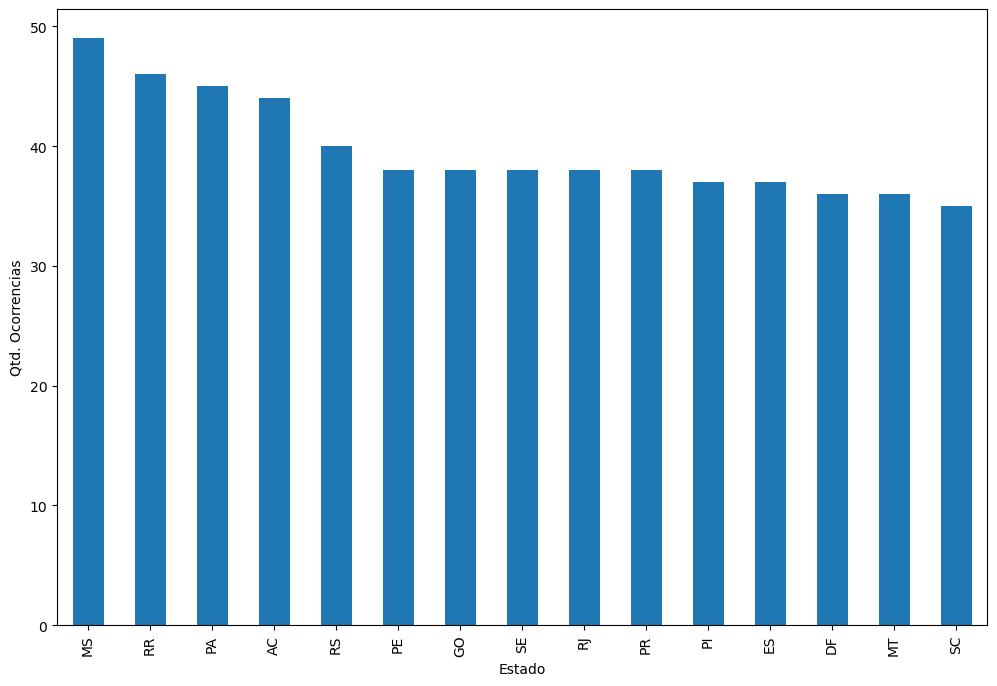

In [26]:
#Plotagem grárfico de barra assinatura pausadas por estado
pausado.groupby(['state'],dropna=False).size().sort_values(ascending=False).head(15).plot.bar(figsize=(12,8),xlabel='Estado',ylabel='Qtd. Ocorrencias')

In [27]:
#Transformando as datas em datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')
df['deleted_at'] = pd.to_datetime(df['deleted_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'], errors='coerce')

In [28]:
#Validando as conversões
df.dtypes

created_at            datetime64[ns]
updated_at            datetime64[ns]
deleted_at            datetime64[ns]
birth_date            datetime64[ns]
status                        object
version                       object
city                          object
state                         object
last_date_purchase    datetime64[ns]
average_ticket               float64
items_quantity                 int64
all_revenue                  float64
all_orders                     int64
recency                        int64
marketing_source              object
dtype: object

In [29]:
df.head()

,created_at,updated_at,deleted_at,birth_date,status,version,city,state,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
id,,,,,,,,,,,,,,,
8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,1974-07-10,active,2.31.7,Peixoto da Praia,AM,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,2040-07-06,paused,3.30.12,Fernandes,RR,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,2063-03-18,active,3.28.9,Lopes,RR,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,1980-11-21,active,3.34.3,Campos do Campo,PE,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,2059-07-07,active,3.19.8,das Neves,RJ,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [30]:
#Compras realizadas no dia do aniversário
df.groupby('birth_date')['recency'].size().sort_values(ascending=False)

birth_date
2042-06-18    5
2070-03-07    5
1991-12-10    4
2068-06-26    4
1974-05-30    4
             ..
1993-11-25    1
1993-11-20    1
1993-11-18    1
1993-11-13    1
2072-12-31    1
Name: recency, Length: 7876, dtype: int64

In [31]:
#Tempo médio de cancelamento
df['tempo_cancelamento'] = df['deleted_at'] - df['created_at']
tempo_medio_cancelamento = df.loc[df['status'] == 'canceled', 'tempo_cancelamento'].mean()
print(tempo_medio_cancelamento)

472 days 04:48:01.306930688


In [32]:
#Tempo médio entre último pedido e cancelamento da assinatura
df['cancelamento_ultimo_pedido'] = df['deleted_at'] - df['last_date_purchase']
tempo_cancelamento_ultimo_pedido = df.loc[df['status'] == 'canceled', 'cancelamento_ultimo_pedido'].mean()
print(tempo_cancelamento_ultimo_pedido)

237 days 14:03:27.326732672


In [33]:
#Cancelamentos diários
df['cancelamento'] = df['deleted_at'].dt.date
cancelamentos_diario = df.groupby(['cancelamento']).size()
cancelamentos_diario

cancelamento
2016-05-02    1
2016-06-21    1
2016-08-11    1
2016-08-14    1
2016-08-19    1
             ..
2021-02-08    2
2021-02-13    2
2021-02-14    6
2021-02-16    3
2021-02-17    4
Length: 384, dtype: int64

<Axes: xlabel='Qtde Cancelamentos.', ylabel='Data'>

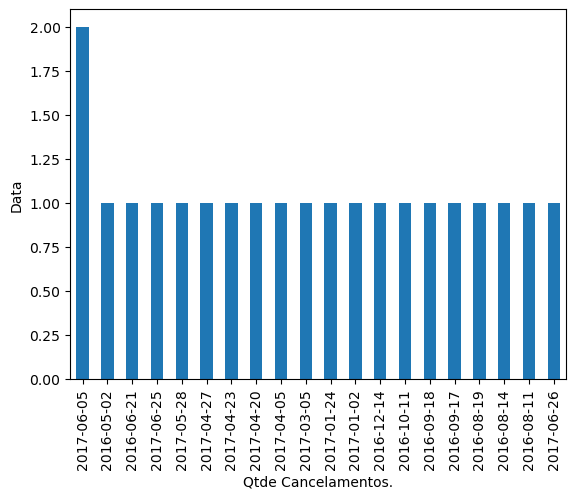

In [34]:
df.groupby(['cancelamento']).size().head(20).sort_values(ascending=False).plot.bar(xlabel='Qtde Cancelamentos.',ylabel='Data',rot=90)

In [35]:
df.to_csv('df_churn_final.csv')